<a href="https://colab.research.google.com/github/Rajfekar/PythonML/blob/main/voting_classifier_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.set_axis(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category'], axis=1)
df.head()

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

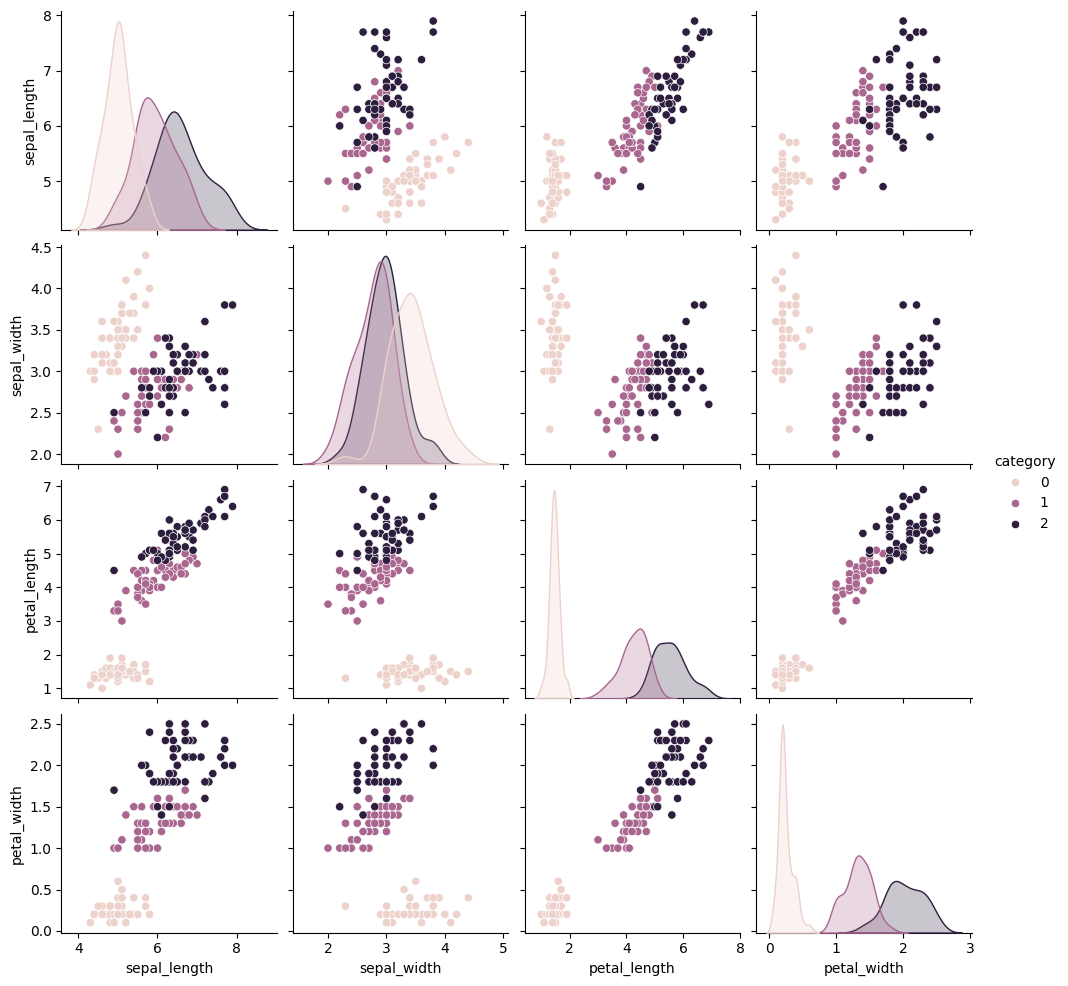

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='category')

In [ ]:
new_df = df[df['category'] != 0][['petal_length','petal_width','category']]

In [ ]:
new_df.head()

,petal_length,petal_width,category
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1


In [ ]:
new_df.shape

(100, 3)

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [ ]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [ ]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.73
knn 0.76


In [ ]:
from sklearn.ensemble import VotingClassifier

## Hard Voting

In [ ]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


## Soft Voting

In [ ]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


## Weighted Voting

In [ ]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))


for i=1,j=1,k=1 0.76
for i=1,j=1,k=2 0.76
for i=1,j=1,k=3 0.76
for i=1,j=2,k=1 0.76
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.73
for i=1,j=3,k=2 0.73
for i=1,j=3,k=3 0.76
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.78
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.76
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.74
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.75
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.77
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.77
for i=3,j=3,k=1 0.75
for i=3,j=3,k=2 0.76
for i=3,j=3,k=3 0.75


## Classifiers of Same Algo

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [ ]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
